<a href="https://colab.research.google.com/github/rohitrnath/Monocular-Depth-Estimation-and-Segmentation/blob/master/Sample-Notebooks/TrainingWith10kImages(DebugMode).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi
# !pkill -9 -f ipykernel_launcher

Sun May 24 21:00:52 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [20]:

from tensorflow import summary
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [22]:
# %tensorboard --logdir /content/gdrive/My Drive/A15/I56/A15/I56/tensorboard
%tensorboard --logdir /content/gdrive/My\ Drive/MD224_Hope_Final_2/tensorboard

<IPython.core.display.Javascript object>

## Download Dataset

In [3]:
!git clone https://github.com/rohitrnath/Monocular-Depth-Estimation-and-Segmentation.git

Cloning into 'Monocular-Depth-Estimation-and-Segmentation'...
remote: Enumerating objects: 89, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 89 (delta 22), reused 72 (delta 14), pack-reused 0
Unpacking objects: 100% (89/89), done.


In [0]:
!cp -r /content/gdrive/My\ Drive/Assignment15/A/Output/Dataset.zip  /content/Monocular-Depth-Estimation-and-Segmentation/


In [6]:
%cd Monocular-Depth-Estimation-and-Segmentation
! unzip -q Dataset.zip -d Dataset
!rm -r Dataset.zip

/content/Monocular-Depth-Estimation-and-Segmentation


In [2]:
%cd Monocular-Depth-Estimation-and-Segmentation

/content/Monocular-Depth-Estimation-and-Segmentation


In [5]:
from model.MDEASModel import *
import torch
from torchsummary import summary

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = MDEASModel().to(device)
summary(model, [(3, 224, 224), (3, 224, 224)])

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 224, 224]             864
       BatchNorm2d-2         [-1, 32, 224, 224]              64
              ReLU-3         [-1, 32, 224, 224]               0
            Conv2d-4         [-1, 32, 112, 112]           9,216
       BatchNorm2d-5         [-1, 32, 112, 112]              64
              ReLU-6         [-1, 32, 112, 112]               0
            Conv2d-7         [-1, 32, 224, 224]             864
       BatchNorm2d-8         [-1, 32, 224, 224]              64
              ReLU-9         [-1, 32, 224, 224]               0
           Conv2d-10         [-1, 32, 112, 112]           9,216
      BatchNorm2d-11         [-1, 32, 112, 112]              64
             ReLU-12         [-1, 32, 112, 112]               0
           Conv2d-13         [-1, 64, 112, 112]             640
           Conv2d-14         [-1, 64, 1

In [0]:
%matplotlib inline
%cd Monocular-Depth-Estimation-and-Segmentation
!python train.py --debug True --logdir /content/gdrive/My\ Drive/test1 --batch-size 32 --test-batch-size 32 

[Errno 2] No such file or directory: 'Monocular-Depth-Estimation-and-Segmentation'
/content/Monocular-Depth-Estimation-and-Segmentation
Namespace(base_size=224, batch_size=32, crop_size=224, cycles=3, dataset='Dataset/label_data.csv', debug=True, device=device(type='cuda'), edge_len=5, epochs=20, eval_limit=-1, logdir='/content/gdrive/My Drive/test1', lr=0.001, lr_max=0.001, lr_min=1e-05, no_val=False, ratio=0.7, resume=None, seed=1, start_epoch=0, test_batch_size=32, warmup=5, workers=4)
2020-05-24 22:22:26.546461: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Starting Epoch: 0
Total Epoches: 20
Training starts at 2020-05-24 22:22:33.551093 
[0][0/219] loss=2.712174654006958 mask_ssim=0.9980589151382446 depth_ssim=0.9940019249916077 mask_l1=0.5126800537109375 depth_l1=0.4720156788825989 mask_mse=0.28902751207351685 depth_mse=0.35914042592048645 Acc-mask=0.0019410784589126706  Acc-depth=0.005998059641569853  Epoch 

## Utils

In [63]:
import torchvision.utils as vutils    
from torch.utils.tensorboard import SummaryWriter

import torch
from torchsummary import summary

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = MDEASModel()
#model.apply(weights_init)

print('Model created.')
PATH = '/content/gdrive/My Drive/MD224_Hope6_withSkip'
_writer = SummaryTracker( PATH)
# _writer.addGraph(model,16)

model = model.to(device)

if device == 'cuda':
    print('cuda')
    model = torch.nn.DataParallel(model)
    cudnn.benchmark = True

# model.load_state_dict(torch.load('Epoch30_hope1.pth'))



Model created.


In [96]:
import torchvision.utils as vutils    
from torch.utils.tensorboard import SummaryWriter

import torch
from torchsummary import summary

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = MDEASModel()
#model.apply(weights_init)

print('Model created.')
PATH = '/content/gdrive/My Drive/MD224_Hope2_5_withSkip'
_writer = SummaryTracker( PATH)
# _writer.addGraph(model,16)

model = model.to(device)

if device == 'cuda':
    print('cuda')
    model = torch.nn.DataParallel(model)
    cudnn.benchmark = True
model.load_state_dict(torch.load('/content/gdrive/My Drive/MD224_Hope2_4_withSkip/checkpoints/best-mask-model.pth'))



Model created.


<All keys matched successfully>

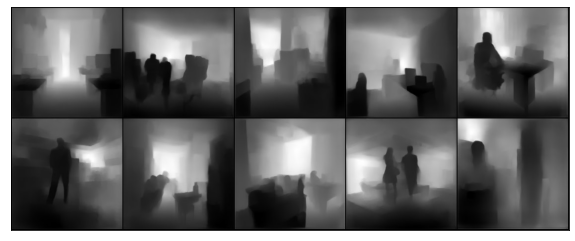

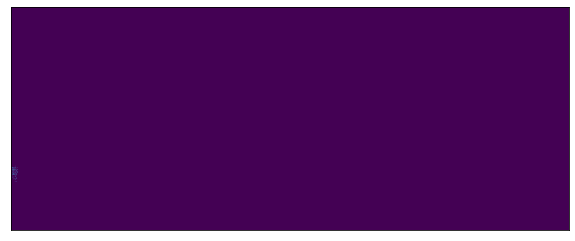

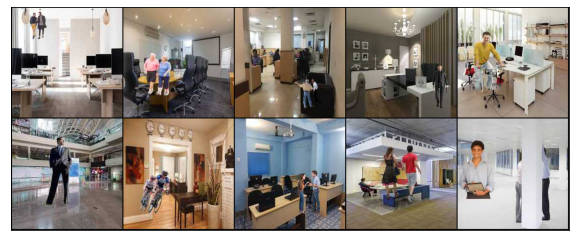

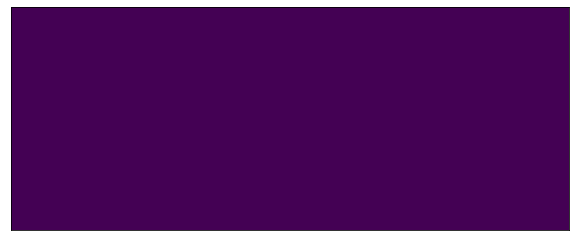

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


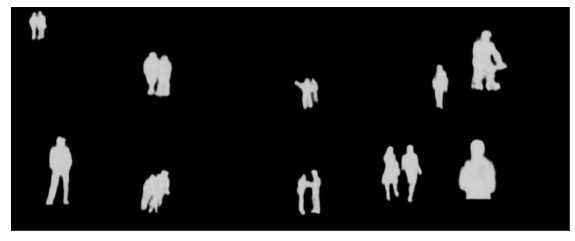

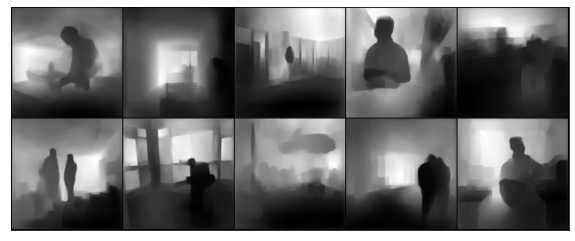

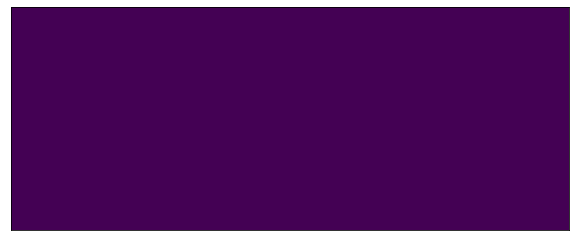

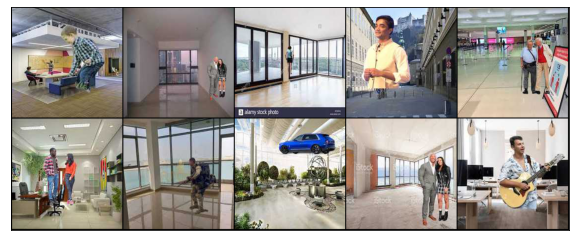

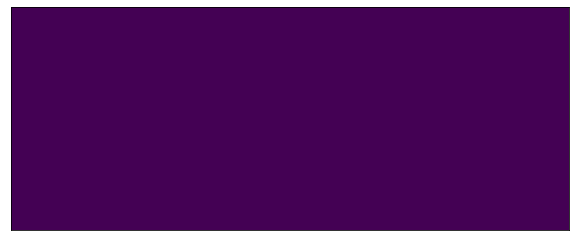

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


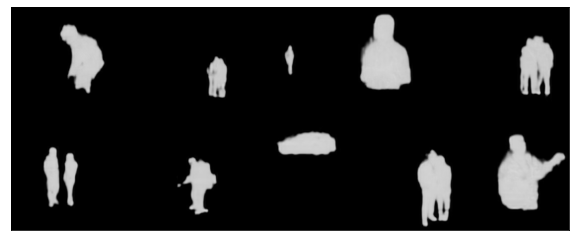

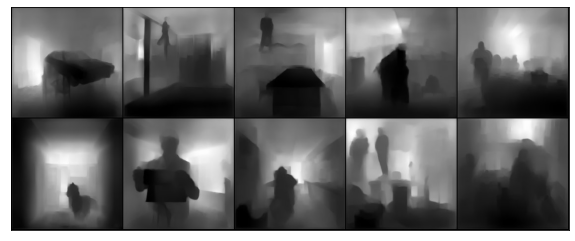

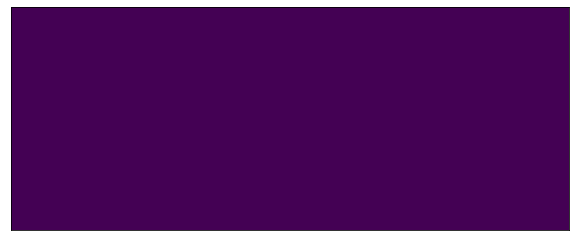

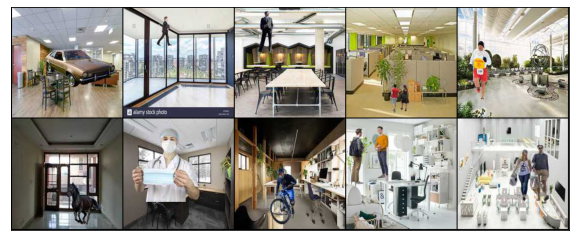

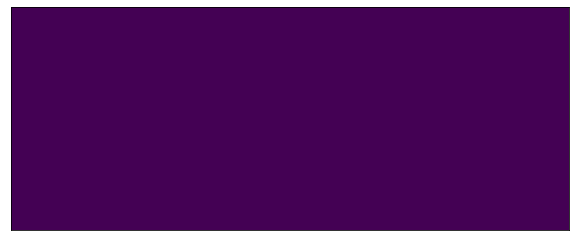

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


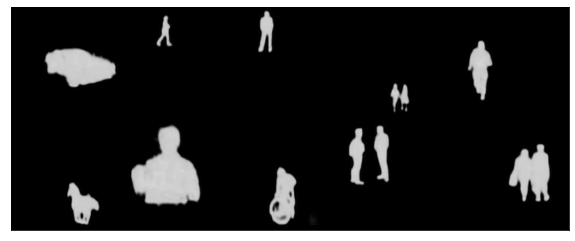

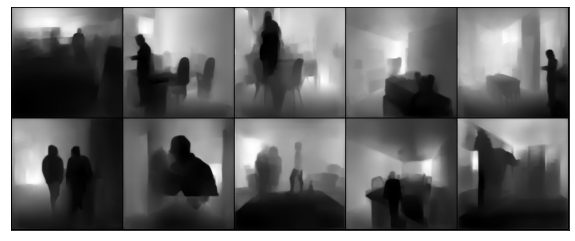

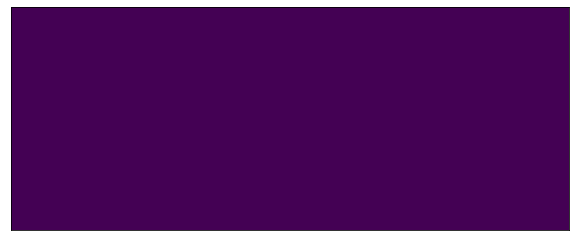

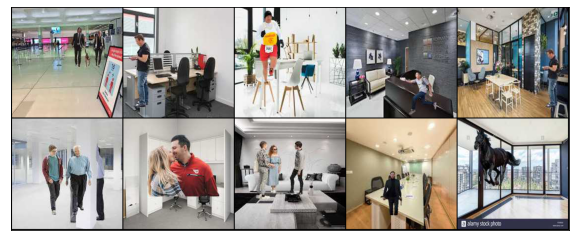

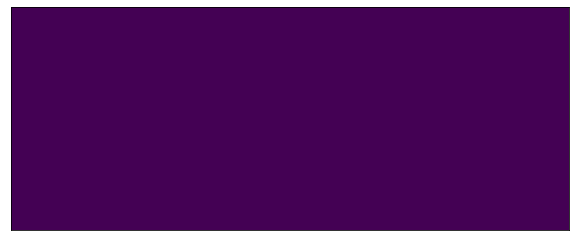

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


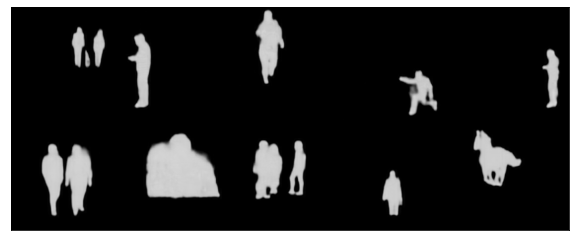

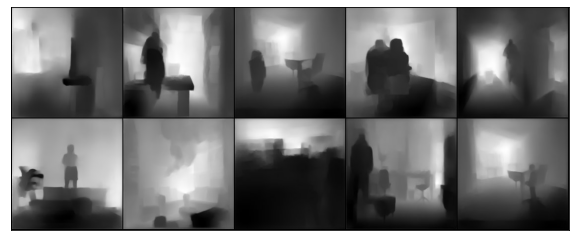

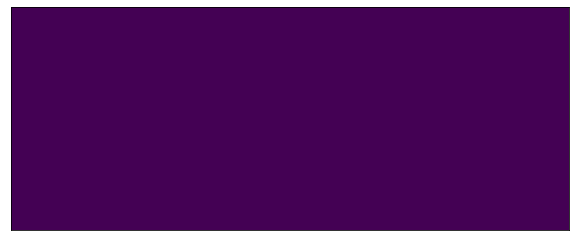

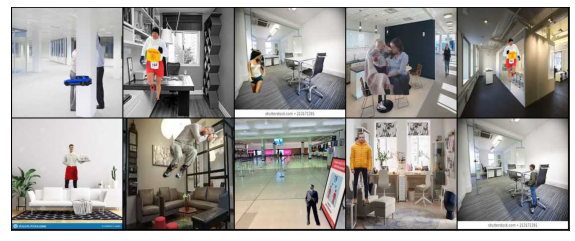

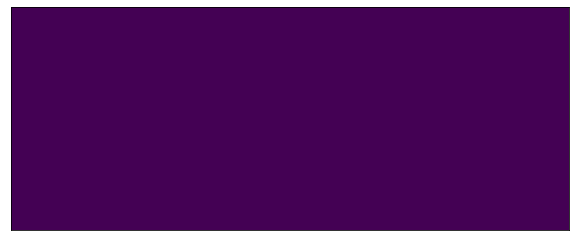

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


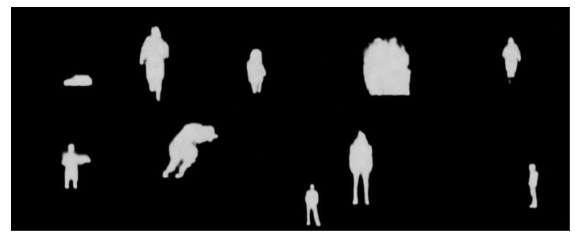

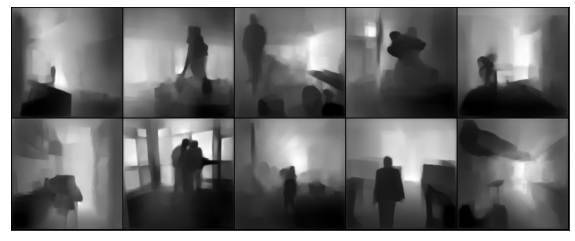

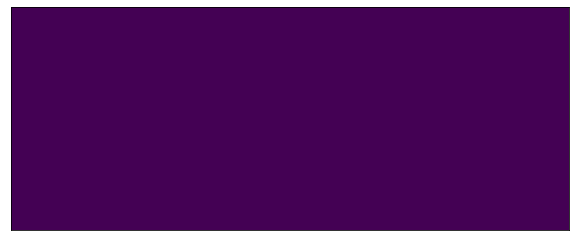

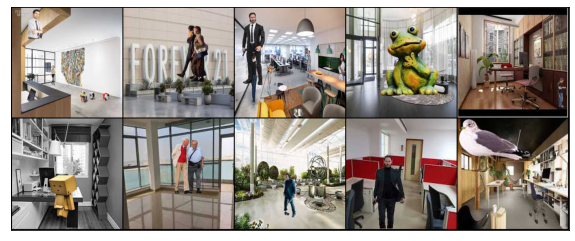

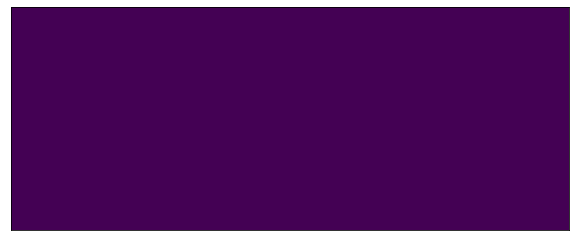

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


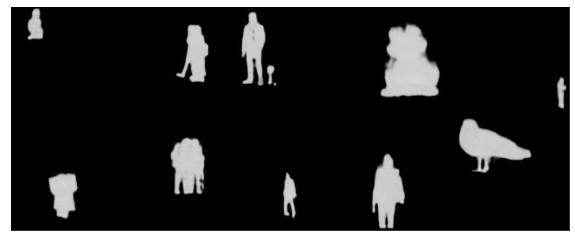

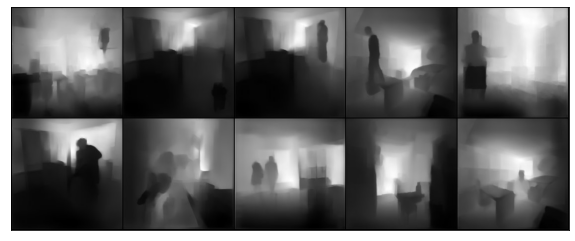

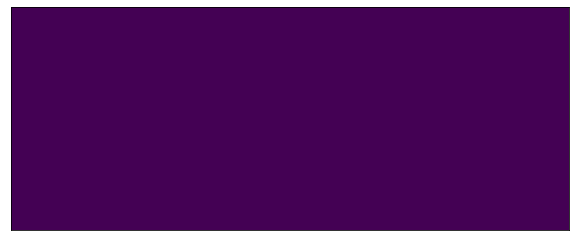

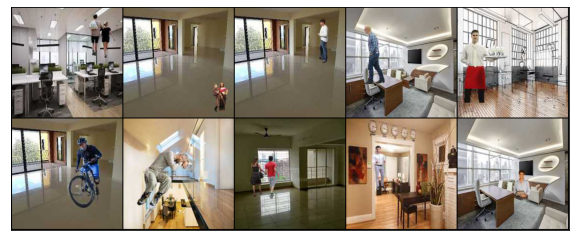

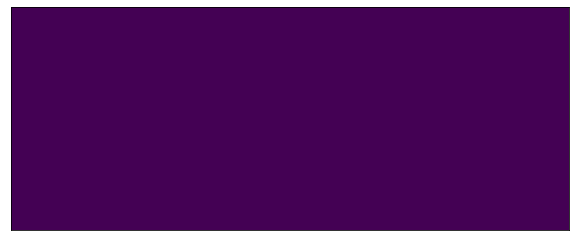

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


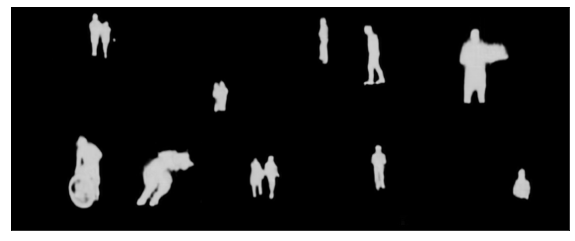

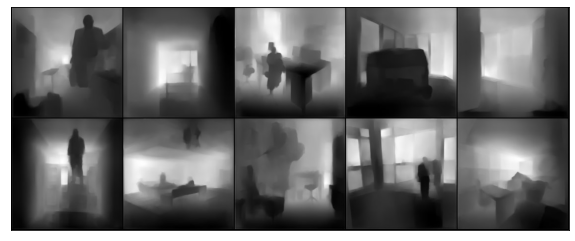

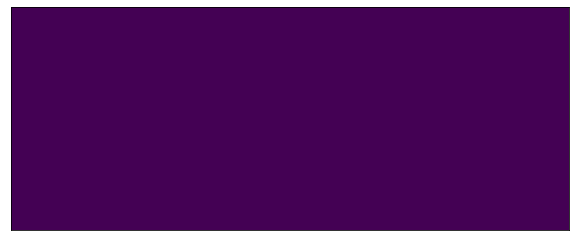

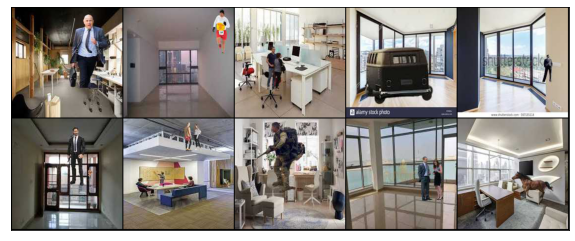

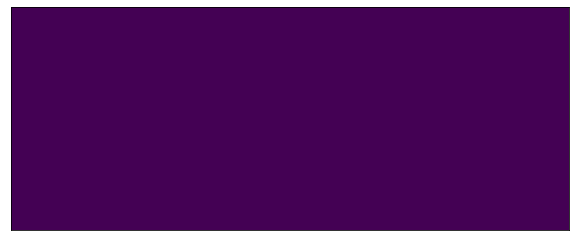

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


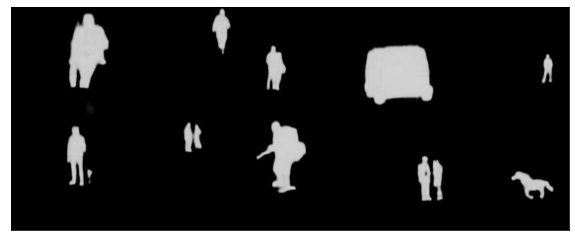

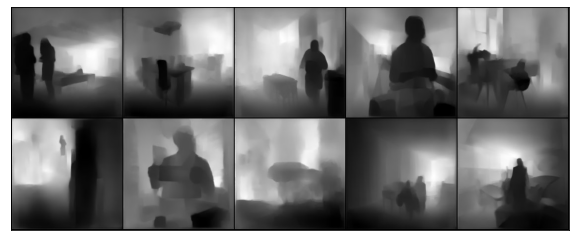

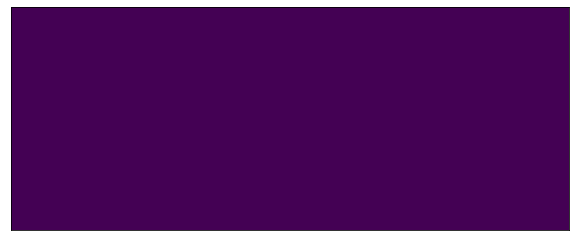

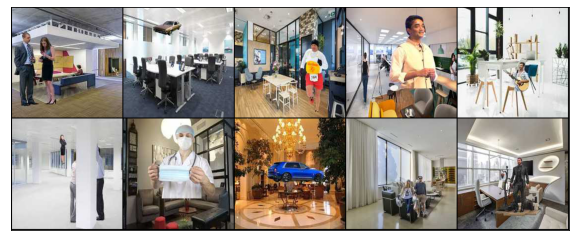

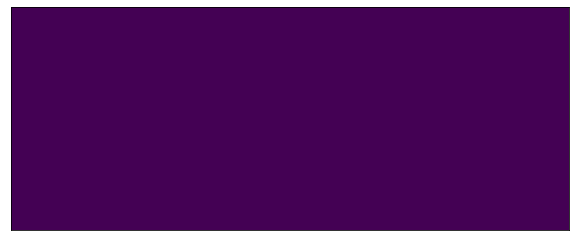

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


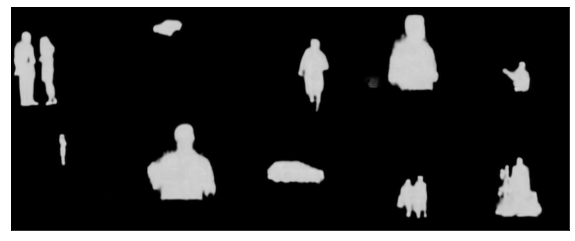

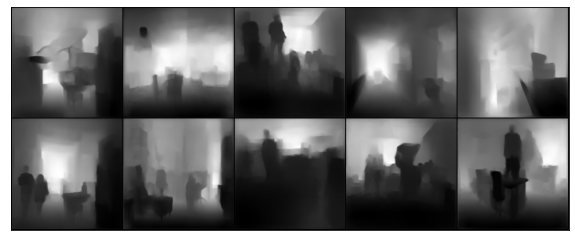

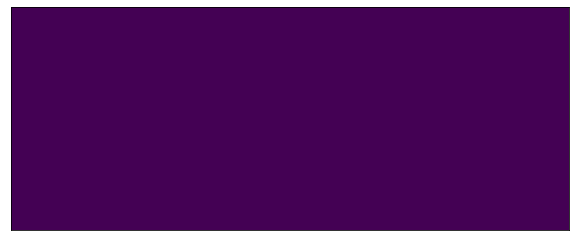

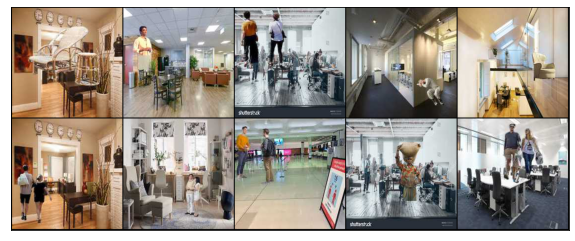

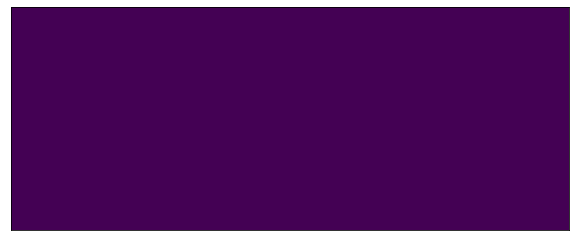

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


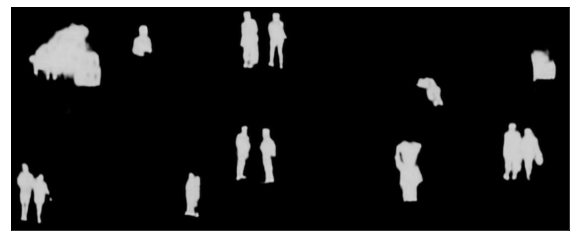

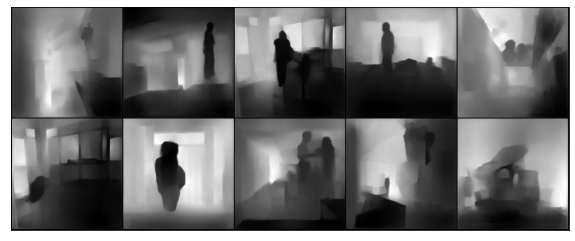

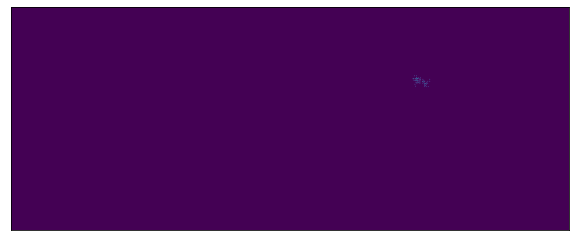

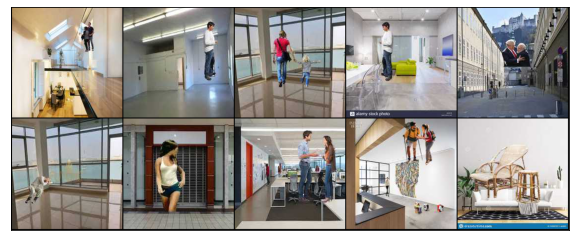

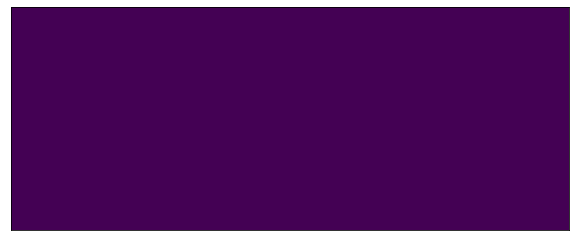

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


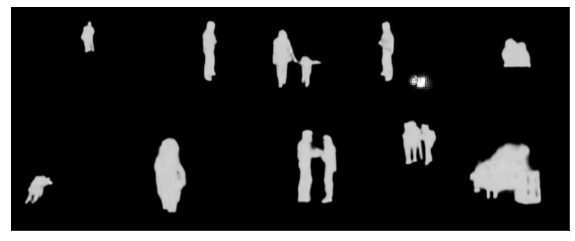

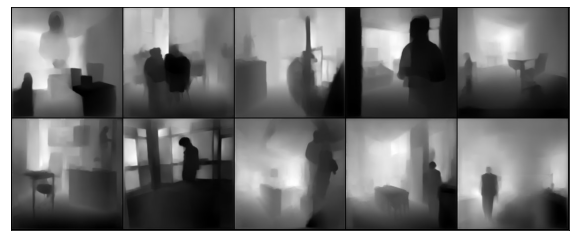

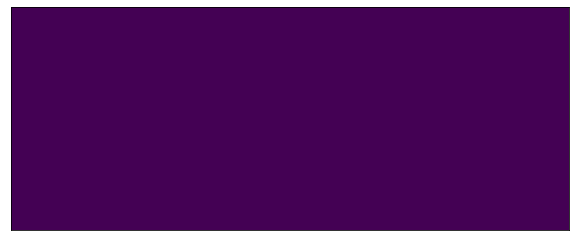

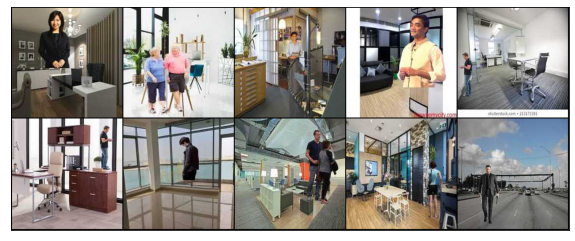

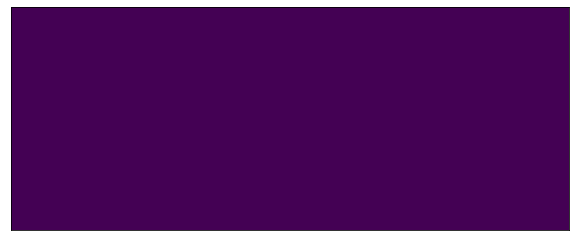

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


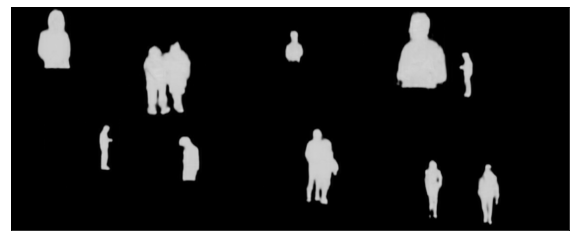

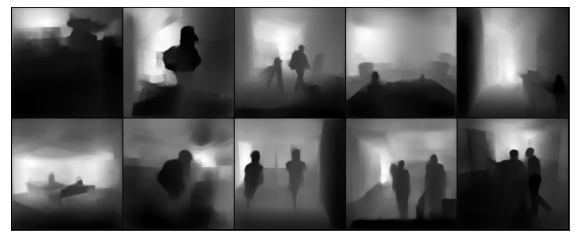

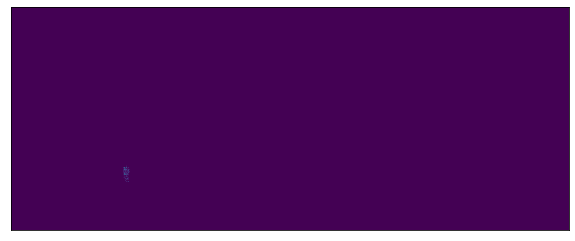

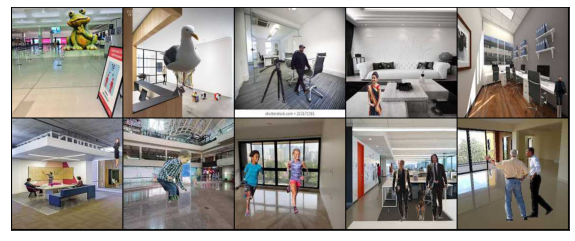

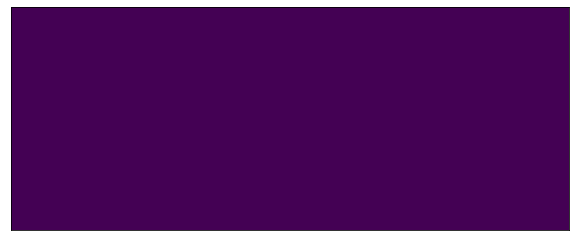

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


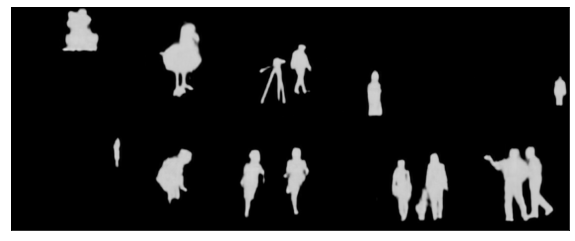

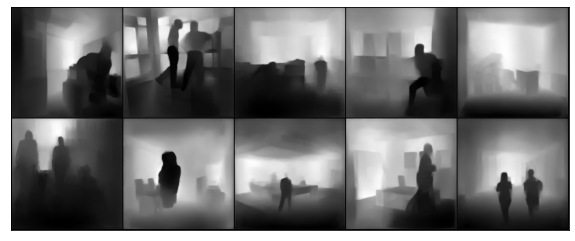

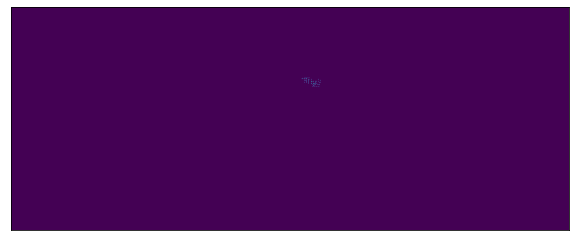

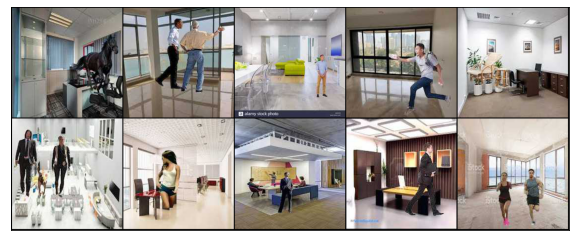

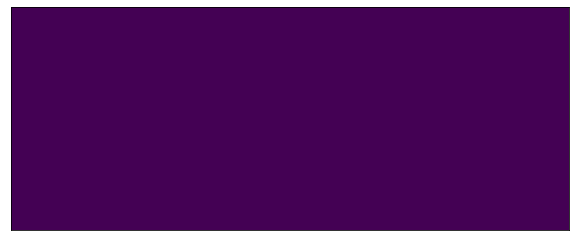

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


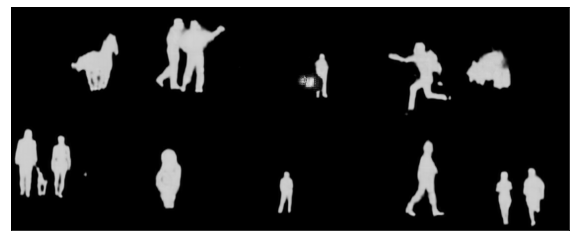

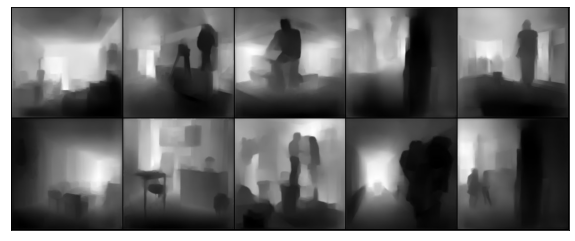

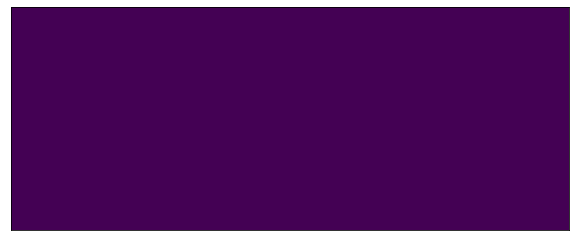

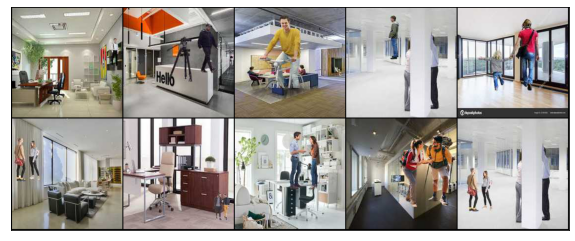

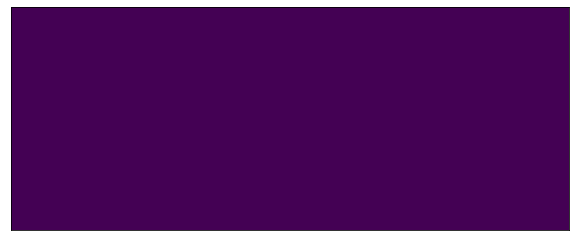

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


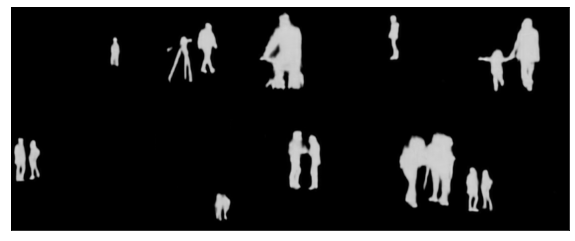

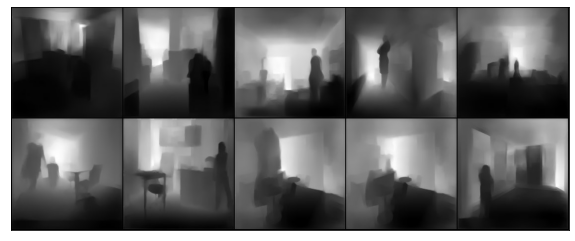

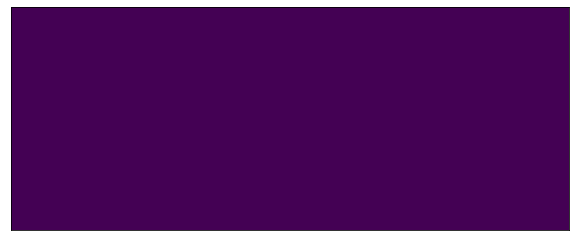

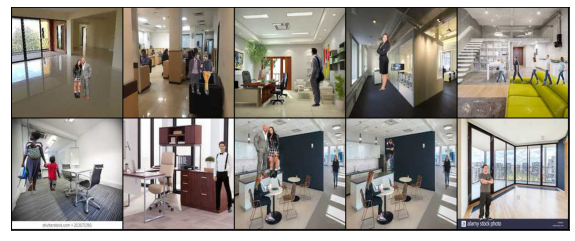

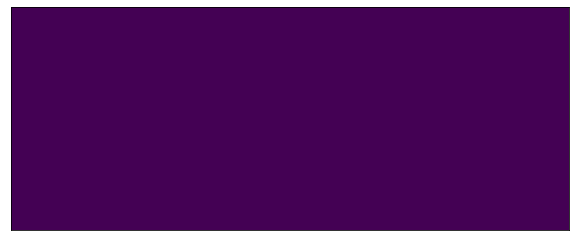

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


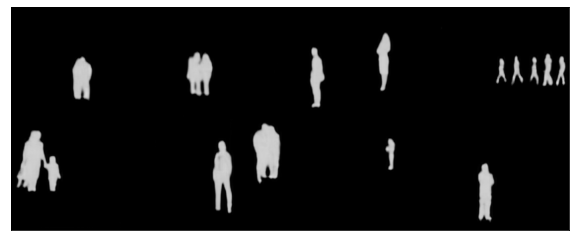

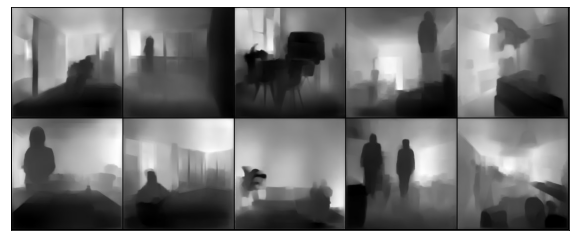

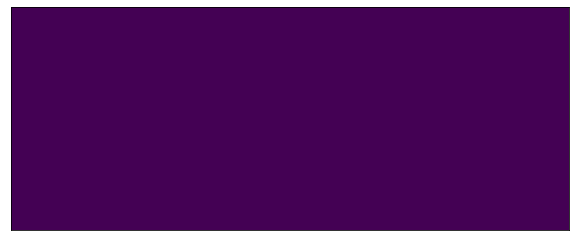

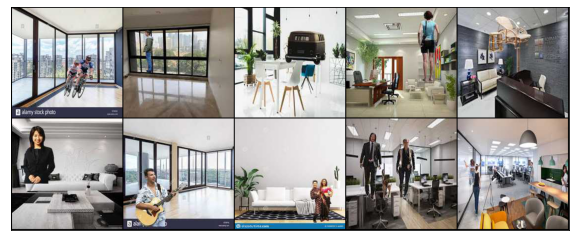

In [0]:
def test(model, device, test_loader):
  model.eval()
  with torch.no_grad():
    for i, sample_batch in enumerate(test_loader):
      bg_n    = sample_batch['bg'].to(device)
      fg_bg_n = sample_batch['fg_bg'].to(device)
      mask_n  = sample_batch['mask'].to(device)
      depth_n = sample_batch['depth'].to(device)
      
      output = model(bg_n,fg_bg_n)

      show(sample_batch['depth'].cpu(), nrow=5)
      show1(output[0].detach().cpu(), nrow=5)
      show(sample_batch['fg_bg'].cpu(), nrow=5)
      show1(sample_batch['mask'].cpu(), nrow=5)
      show(output[1].detach().cpu(), nrow=5)
      if i > 20:
        break


test(model, device, m_test_loader)

In [24]:
test(start=0,end=25)

Training starts at 2020-05-23 04:37:31.365986 
LR =  0.0001


RuntimeError: ignored